In [218]:
import pandas as pd
import numpy as np

# magic line for matplot lib to plot inline
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('titanic-train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [220]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:

labels = {
    'SibSp': 'Siblings/Spouse',
    'Parch': 'ParentChildren',
}

In [222]:
df.loc[0:4, 'Ticket']
# The same as:
# df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [223]:
# details of row 1
df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [224]:
df[(df.Age==11)|(df.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


In [225]:
print df['Age'].mean()
print df['Fare'].median()

29.6991176471
14.4542


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [227]:
#df['Age'].fillna(30)[:10]

In [228]:
# find the average as of survival/death
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [229]:
df.pivot_table(index='Sex', columns='Parch', values='Survived', aggfunc='sum')

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,153.0,46.0,30.0,3.0,0.0,1.0,0.0
male,80.0,19.0,10.0,0.0,0.0,0.0,NaN


In [230]:
df.pivot_table(index='Sex', columns='SibSp', values='Survived', aggfunc='sum')

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,137,80,10,4,2,0,0
male,73,32,3,0,1,0,0


In [231]:
# dead passengers
df[df.Survived==0]['Name']

0                                Braund, Mr. Owen Harris
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
16                                  Rice, Master. Eugene
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
20                                  Fynney, Mr. Joseph J
24                         Palsson, Miss. Torborg Danira
26                               Emir, Mr. Farred Chehab
27                        Fortune, Mr. Charles Alexander
29                                   Todoroff, Mr. Lalio
30                              Uruchurtu, Don. Manuel E
33                                 Wheadon, Mr. Edward H
34                             

In [232]:
# cheap tickets in third class
df[(df.Pclass==3)&(df.Fare<40.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [233]:
# name of passenger id=674
df[df.PassengerId==674]['Name']

673    Wilhelms, Mr. Charles
Name: Name, dtype: object

In [234]:
# number of survived and the number of dead passengers
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [235]:
# survived vs dead
df.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [236]:
# survival by gender
df[df.Survived==1].groupby('Sex')['PassengerId'].count()

Sex
female    233
male      109
Name: PassengerId, dtype: int64

In [237]:
# average age of survival


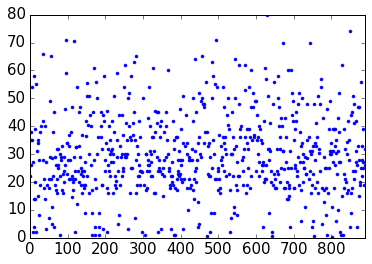

In [238]:
df.Age.plot(style='.', fontsize=15)

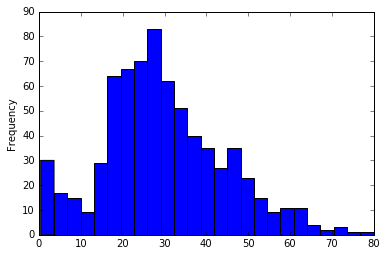

In [239]:
# histograms
df.Age.plot(kind='hist', bins=25)

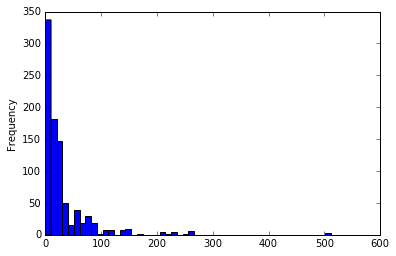

In [240]:
df.Fare.plot(kind='hist', bins=50)

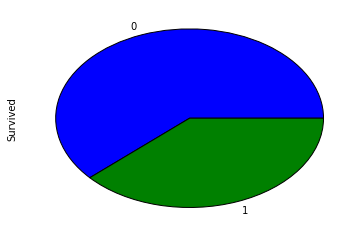

In [241]:
# df.groupby('Survived')['PassengerId'].count().plot(kind='Pie')
df['Survived'].value_counts().plot(kind='Pie')

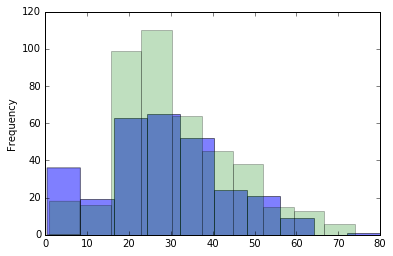

In [242]:
# histogram for age of dead vs survived
df[df.Survived==1]['Age'].plot(kind='hist', alpha=.5)
df[df.Survived==0]['Age'].plot(kind='hist', alpha=.25)

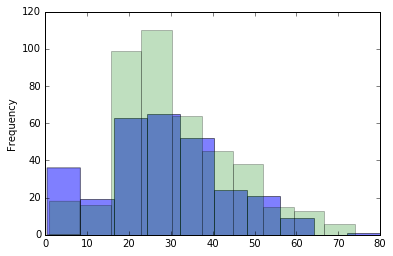

In [243]:
df[df.Survived==1]['Age'].plot(kind='hist', alpha=.5)
df[df.Survived==0]['Age'].plot(kind='hist', alpha=.25)

In [244]:
# age histogram for the two sub-populations of male and female in the same plot


In [245]:
# plot a bar chart of the port of embarkement


In [246]:
import seaborn as sns

sns.violinplot(x='Sex', y='Age', hue="Survived", data=df, palette="muted")

ImportError: No module named seaborn